In [1]:
import pandas as pd
import numpy as np

# Define your dataset path
base_path = '../dataset/' 

# Load CSVs
features = pd.read_csv(base_path + 'elliptic_txs_features.csv', header=None)
labels = pd.read_csv(base_path + 'elliptic_txs_classes.csv')
edges = pd.read_csv(base_path + 'elliptic_txs_edgelist.csv')

# Rename columns
features.columns = ['tx_id'] + [f'feature_{i}' for i in range(1, 167)]
labels.columns = ['tx_id', 'class']

# Merge features with labels
data = pd.merge(features, labels, on='tx_id', how='left')

# Quick check
print("Dataset shape:", data.shape)
print("Label distribution:\n", data['class'].value_counts(dropna=False))
data.head()


Dataset shape: (203769, 168)
Label distribution:
 class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


,tx_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


In [2]:
# Filter out unknown labels
labeled_data = data[data['class'].isin([1, 2])].copy()

# Relabel: 1 = Illicit, 2 = Licit → make it binary (0 = licit, 1 = illicit)
labeled_data['class'] = labeled_data['class'].apply(lambda x: 1 if x == 1 else 0)

print("New label distribution:\n", labeled_data['class'].value_counts())
labeled_data.head()


New label distribution:
 Series([], Name: count, dtype: int64)


,tx_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,class


In [3]:
print("Class column values:", data['class'].unique())
print("Data type:", data['class'].dtype)



Class column values: ['unknown' '2' '1']
Data type: object


In [4]:
# Convert 'class' column to numeric: '1' → 1, '2' → 2, 'unknown' → NaN
data['class'] = pd.to_numeric(data['class'], errors='coerce')

# Now keep only rows with labeled data (class 1 or 2)
labeled_data = data[data['class'].isin([1, 2])].copy()

# Relabel: illicit = 1, licit = 0
labeled_data['class'] = labeled_data['class'].apply(lambda x: 1 if x == 1 else 0)

# Show label distribution
print("Label distribution:\n", labeled_data['class'].value_counts())
labeled_data.head()


Label distribution:
 class
0    42019
1     4545
Name: count, dtype: int64


,tx_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,class
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,0
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,0


In [ ]:
pip install scikit-learn matplotlib seaborn


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12606
           1       1.00      0.87      0.93      1364

    accuracy                           0.99     13970
   macro avg       0.99      0.93      0.96     13970
weighted avg       0.99      0.99      0.99     13970

Confusion Matrix:
 [[12602     4]
 [  183  1181]]


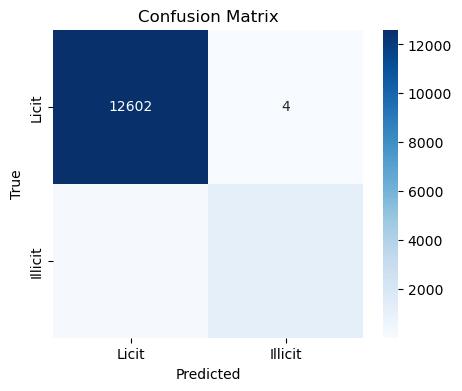

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Features and labels
X = labeled_data.drop(columns=['tx_id', 'class'])
y = labeled_data['class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [6]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12606
           1       0.99      0.89      0.94      1364

    accuracy                           0.99     13970
   macro avg       0.99      0.94      0.97     13970
weighted avg       0.99      0.99      0.99     13970

Confusion Matrix:
 [[12597     9]
 [  150  1214]]


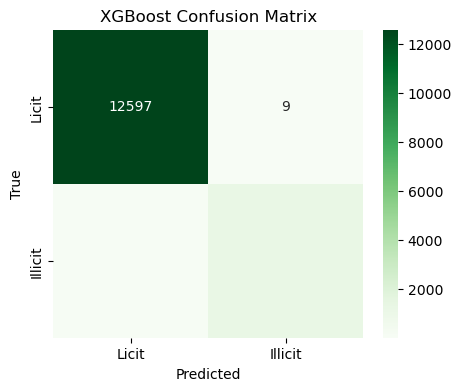

In [7]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Create DMatrix for XGBoost (optional, but efficient)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'seed': 42
}

# Train model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict (output is probability, so convert to 0/1)
y_pred_proba = xgb_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
